## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.329381 -0.935302  1.503994  0.062310 -1.410873 -0.249004
1  1.091403  0.433297  0.543096  0.428129  1.251468  1.343684
2 -0.393249 -0.041941  0.986160 -0.138275  1.614219  0.489893
3  0.329815  1.381719  0.529475  1.695366  0.085283  1.610948
4 -0.312913 -0.331421 -0.691285  0.419644 -1.303447 -0.323269


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9616066	total: 57.7ms	remaining: 57.6s
1:	learn: 0.9499598	total: 58.2ms	remaining: 29s
2:	learn: 0.9408099	total: 58.7ms	remaining: 19.5s
3:	learn: 0.9322160	total: 59.1ms	remaining: 14.7s
4:	learn: 0.9246131	total: 59.7ms	remaining: 11.9s
5:	learn: 0.9140113	total: 60.3ms	remaining: 9.98s
6:	learn: 0.9032180	total: 60.7ms	remaining: 8.61s
7:	learn: 0.8942717	total: 61.2ms	remaining: 7.59s
8:	learn: 0.8870884	total: 61.6ms	remaining: 6.78s
9:	learn: 0.8779591	total: 62.1ms	remaining: 6.15s
10:	learn: 0.8708408	total: 62.5ms	remaining: 5.62s
11:	learn: 0.8618762	total: 63.1ms	remaining: 5.19s
12:	learn: 0.8537897	total: 63.7ms	remaining: 4.83s
13:	learn: 0.8439033	total: 64.2ms	remaining: 4.52s
14:	learn: 0.8366212	total: 64.6ms	remaining: 4.24s
15:	learn: 0.8290948	total: 65ms	remaining: 4s
16:	learn: 0.8218104	total: 65.5ms	remaining: 3.79s
17:	learn: 0.8145396	total: 65.9ms	remaining: 3.6s
18:	learn: 0.8073240	total: 66.3ms	remaining: 3.42s


109:	learn: 0.3682147	total: 108ms	remaining: 877ms
110:	learn: 0.3657049	total: 109ms	remaining: 872ms
111:	learn: 0.3629059	total: 109ms	remaining: 867ms
112:	learn: 0.3603304	total: 110ms	remaining: 861ms
113:	learn: 0.3578593	total: 110ms	remaining: 857ms
114:	learn: 0.3550284	total: 111ms	remaining: 851ms
115:	learn: 0.3522954	total: 111ms	remaining: 847ms
116:	learn: 0.3494258	total: 111ms	remaining: 841ms
117:	learn: 0.3465366	total: 112ms	remaining: 835ms
118:	learn: 0.3445469	total: 112ms	remaining: 830ms
119:	learn: 0.3415378	total: 112ms	remaining: 825ms
120:	learn: 0.3387889	total: 113ms	remaining: 820ms
121:	learn: 0.3367156	total: 113ms	remaining: 816ms
122:	learn: 0.3340889	total: 114ms	remaining: 813ms
123:	learn: 0.3317669	total: 114ms	remaining: 808ms
124:	learn: 0.3291937	total: 115ms	remaining: 805ms
125:	learn: 0.3266799	total: 115ms	remaining: 800ms
126:	learn: 0.3239544	total: 117ms	remaining: 801ms
127:	learn: 0.3216798	total: 117ms	remaining: 796ms
128:	learn: 

278:	learn: 0.1281026	total: 187ms	remaining: 483ms
279:	learn: 0.1279037	total: 188ms	remaining: 482ms
280:	learn: 0.1274660	total: 188ms	remaining: 481ms
281:	learn: 0.1268877	total: 188ms	remaining: 480ms
282:	learn: 0.1265931	total: 189ms	remaining: 479ms
283:	learn: 0.1255789	total: 189ms	remaining: 477ms
284:	learn: 0.1252908	total: 190ms	remaining: 476ms
285:	learn: 0.1250065	total: 190ms	remaining: 476ms
286:	learn: 0.1247083	total: 191ms	remaining: 475ms
287:	learn: 0.1243979	total: 191ms	remaining: 473ms
288:	learn: 0.1233159	total: 192ms	remaining: 472ms
289:	learn: 0.1231184	total: 192ms	remaining: 471ms
290:	learn: 0.1227367	total: 193ms	remaining: 470ms
291:	learn: 0.1218402	total: 193ms	remaining: 469ms
292:	learn: 0.1215699	total: 194ms	remaining: 468ms
293:	learn: 0.1205631	total: 194ms	remaining: 466ms
294:	learn: 0.1196285	total: 195ms	remaining: 465ms
295:	learn: 0.1187380	total: 195ms	remaining: 464ms
296:	learn: 0.1184745	total: 196ms	remaining: 463ms
297:	learn: 

497:	learn: 0.0495644	total: 291ms	remaining: 294ms
498:	learn: 0.0494306	total: 292ms	remaining: 293ms
499:	learn: 0.0491302	total: 293ms	remaining: 293ms
500:	learn: 0.0490056	total: 293ms	remaining: 292ms
501:	learn: 0.0487924	total: 294ms	remaining: 291ms
502:	learn: 0.0485841	total: 294ms	remaining: 291ms
503:	learn: 0.0484558	total: 295ms	remaining: 290ms
504:	learn: 0.0482807	total: 295ms	remaining: 289ms
505:	learn: 0.0480849	total: 296ms	remaining: 289ms
506:	learn: 0.0478455	total: 296ms	remaining: 288ms
507:	learn: 0.0476454	total: 296ms	remaining: 287ms
508:	learn: 0.0475422	total: 297ms	remaining: 286ms
509:	learn: 0.0474419	total: 297ms	remaining: 286ms
510:	learn: 0.0473446	total: 298ms	remaining: 285ms
511:	learn: 0.0470808	total: 298ms	remaining: 284ms
512:	learn: 0.0469605	total: 299ms	remaining: 283ms
513:	learn: 0.0467300	total: 299ms	remaining: 283ms
514:	learn: 0.0465407	total: 300ms	remaining: 282ms
515:	learn: 0.0463845	total: 300ms	remaining: 281ms
516:	learn: 

665:	learn: 0.0242723	total: 369ms	remaining: 185ms
666:	learn: 0.0241150	total: 370ms	remaining: 185ms
667:	learn: 0.0239616	total: 370ms	remaining: 184ms
668:	learn: 0.0238511	total: 371ms	remaining: 183ms
669:	learn: 0.0237024	total: 371ms	remaining: 183ms
670:	learn: 0.0235952	total: 372ms	remaining: 182ms
671:	learn: 0.0234815	total: 372ms	remaining: 182ms
672:	learn: 0.0233483	total: 373ms	remaining: 181ms
673:	learn: 0.0232453	total: 373ms	remaining: 180ms
674:	learn: 0.0231130	total: 374ms	remaining: 180ms
675:	learn: 0.0230060	total: 374ms	remaining: 179ms
676:	learn: 0.0228655	total: 374ms	remaining: 179ms
677:	learn: 0.0228150	total: 375ms	remaining: 178ms
678:	learn: 0.0226783	total: 376ms	remaining: 178ms
679:	learn: 0.0225451	total: 376ms	remaining: 177ms
680:	learn: 0.0224478	total: 377ms	remaining: 176ms
681:	learn: 0.0223231	total: 377ms	remaining: 176ms
682:	learn: 0.0222196	total: 378ms	remaining: 175ms
683:	learn: 0.0220987	total: 378ms	remaining: 175ms
684:	learn: 

884:	learn: 0.0104323	total: 474ms	remaining: 61.6ms
885:	learn: 0.0103762	total: 475ms	remaining: 61.1ms
886:	learn: 0.0103495	total: 475ms	remaining: 60.6ms
887:	learn: 0.0102938	total: 476ms	remaining: 60ms
888:	learn: 0.0102550	total: 476ms	remaining: 59.5ms
889:	learn: 0.0102172	total: 477ms	remaining: 59ms
890:	learn: 0.0101638	total: 478ms	remaining: 58.4ms
891:	learn: 0.0101273	total: 478ms	remaining: 57.9ms
892:	learn: 0.0101015	total: 479ms	remaining: 57.4ms
893:	learn: 0.0100742	total: 479ms	remaining: 56.8ms
894:	learn: 0.0100474	total: 480ms	remaining: 56.3ms
895:	learn: 0.0100226	total: 480ms	remaining: 55.7ms
896:	learn: 0.0099716	total: 481ms	remaining: 55.2ms
897:	learn: 0.0099369	total: 481ms	remaining: 54.6ms
898:	learn: 0.0098876	total: 482ms	remaining: 54.1ms
899:	learn: 0.0098630	total: 482ms	remaining: 53.6ms
900:	learn: 0.0098260	total: 483ms	remaining: 53ms
901:	learn: 0.0098001	total: 483ms	remaining: 52.5ms
902:	learn: 0.0097468	total: 484ms	remaining: 51.9ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

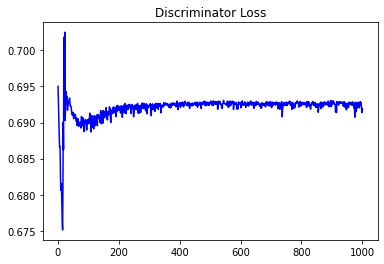

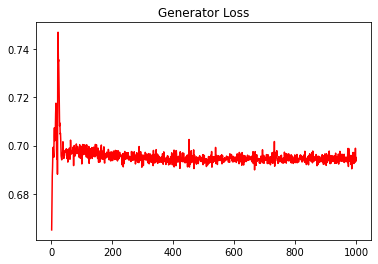

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13590320853345722


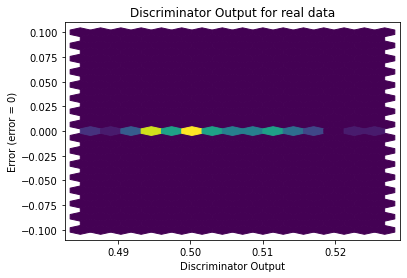

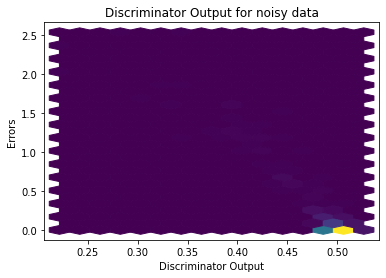

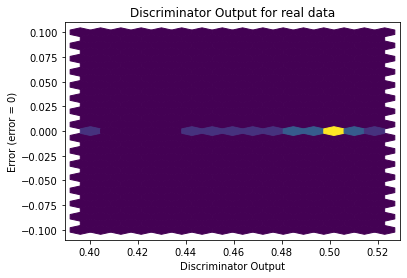

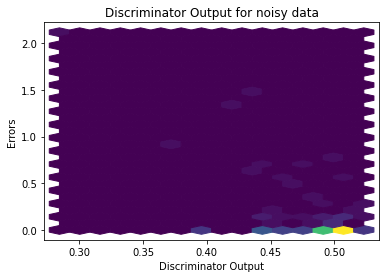

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


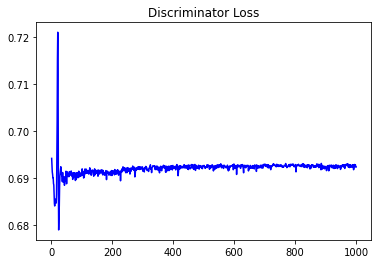

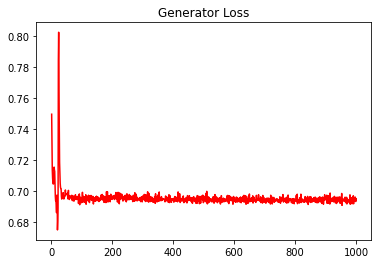

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09256838285558469


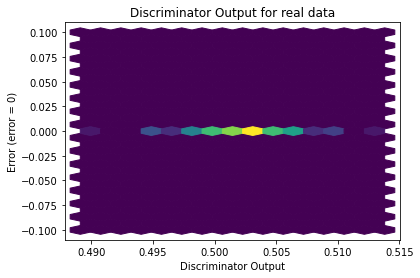

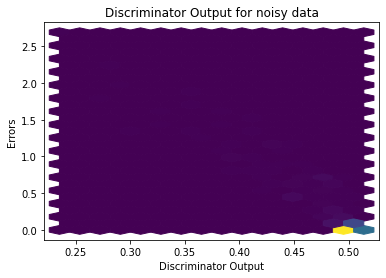

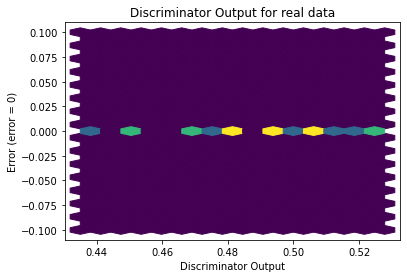

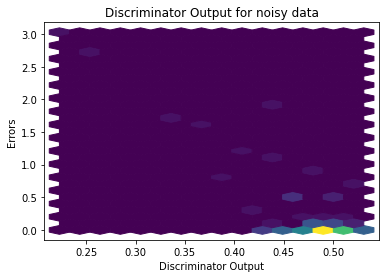

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8733]], requires_grad=True)
